In [ ]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot
!pip install scikit-learn

In [1]:

!pip uninstall torch torchvision torchtext torchdata torchaudio --yes
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: torchvision 0.16.0+cu118
Uninstalling torchvision-0.16.0+cu118:
  Successfully uninstalled torchvision-0.16.0+cu118
Found existing installation: torchtext 0.16.0
Uninstalling torchtext-0.16.0:
  Successfully uninstalled torchtext-0.16.0
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchdata-0.7.0
Found existing installation: torchaudio 2.1.0+cu118
Uninstalling torchaudio-2.1.0+cu118:
  Successfully uninstalled torchaudio-2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import torch
import networkx as nx
import pandas
print("Using torch", torch.__version__)

Using torch 2.1.0+cu121


In [3]:
!pip uninstall torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric --yes
!pip uninstall ogb --yes

In [4]:
!pip install  --verbose torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install  --verbose ogb  # for datasets

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.9 MB/s eta 0:00:00
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.9 MB/s eta 0:00:00
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-jr5m9862/littleutils.egg-info
  writing /tmp/pip-pip-egg-info-jr5m9862/littleutils.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-jr5m9862/littleutils.egg-info/dependency_links

In [5]:
from torch_geometric.data import Data
from torch_geometric import nn
import torch_geometric.transforms as T
import numpy as np
import torch.optim as optim


In [6]:
import pickle
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

In [8]:

email_data = load_data('Data/email_data.pkl')

In [9]:
print(email_data)
print('===========================================================================================================')


# Gather some statistics about the graph.
print(f'Number of nodes: {email_data.num_nodes}')
print(f'Number of edges: {email_data.num_edges}')
print(f'Average node degree: {email_data.num_edges / email_data.num_nodes:.2f}')
print(f'Has isolated nodes: {email_data.has_isolated_nodes()}')
print(f'Has self-loops: {email_data.has_self_loops()}')
print(f'Is undirected: {email_data.is_undirected()}')

Data(x=[1005, 1], edge_index=[2, 15906], y=[1005], edge_labels=[15906], edge_attr=[15906, 1])
Number of nodes: 1005
Number of edges: 15906
Average node degree: 15.83
Has isolated nodes: True
Has self-loops: True
Is undirected: True


In [10]:
import torch_geometric.transforms as T

split = T.RandomLinkSplit(num_val=0.05, num_test=0.15, is_undirected=True, add_negative_train_samples=False)
email_data3=split(email_data)

In [11]:
train_data, val_data, test_data  = email_data3
print(train_data)
print(val_data)
print(test_data)

Data(x=[1005, 1], edge_index=[2, 13754], y=[1005], edge_labels=[13754], edge_attr=[13754, 1], edge_label=[6877], edge_label_index=[2, 6877])
Data(x=[1005, 1], edge_index=[2, 13754], y=[1005], edge_labels=[13754], edge_attr=[13754, 1], edge_label=[858], edge_label_index=[2, 858])
Data(x=[1005, 1], edge_index=[2, 14612], y=[1005], edge_labels=[14612], edge_attr=[14612, 1], edge_label=[2578], edge_label_index=[2, 2578])


In [12]:
print(train_data)
print(val_data)
print(test_data)

Data(x=[1005, 1], edge_index=[2, 13754], y=[1005], edge_labels=[13754], edge_attr=[13754, 1], edge_label=[6877], edge_label_index=[2, 6877])
Data(x=[1005, 1], edge_index=[2, 13754], y=[1005], edge_labels=[13754], edge_attr=[13754, 1], edge_label=[858], edge_label_index=[2, 858])
Data(x=[1005, 1], edge_index=[2, 14612], y=[1005], edge_labels=[14612], edge_attr=[14612, 1], edge_label=[2578], edge_label_index=[2, 2578])


In [13]:
print(train_data.edge_labels)

tensor([0., 1., 1.,  ..., 0., 2., 0.])


In [14]:
print("Number of the nodes in training, validation and test data are", train_data.num_nodes, val_data.num_nodes, test_data.num_nodes)
print("Number of the edges in training, validation and test data are", train_data.num_edges, val_data.num_edges, test_data.num_edges)
# print("Number of the edge_label_index in training, validation and test data are", train_data.edge_label_index.shape[1],
#                                                                                   val_data.edge_label_index.shape[1],
#                                                                                   test_data.edge_label_index.shape[1])
print("Number of the edge_labels in training, validation and test data are", train_data.edge_labels.size(0),
                                                                                  val_data.edge_labels.size(0),
                                                                                  test_data.edge_labels.size(0))

Number of the nodes in training, validation and test data are 1005 1005 1005
Number of the edges in training, validation and test data are 13754 13754 14612
Number of the edge_labels in training, validation and test data are 13754 13754 14612


In [44]:
# Define GCN
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()

        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.act = torch.nn.ReLU()

    def forward(self, node_feature, edge_index):

        output = self.conv1(node_feature, edge_index)
        output = self.act(output)
        output = self.conv2(output, edge_index)

        return output

In [45]:
# Define the EdgeClassifier model

class EdgeClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, GCN_output_dim, output_dim):
        super(EdgeClassifier, self).__init__()
        self.gcn = GCN(input_dim, hidden_dim, GCN_output_dim)
        self.classifier1 = nn.Linear((2 * GCN_output_dim+1), 64)
        self.classifier2 = nn.Linear(64, output_dim)
        self.act = torch.nn.ReLU()

    def forward(self, x, edge_index, edge_attr):
        x = self.gcn(x, edge_index)
        x_src, x_dst = x[edge_index[0]], x[edge_index[1]]
        edge_feat = torch.cat([x_src, edge_attr, x_dst], dim=-1)
        output = self.classifier1(edge_feat)
        output = self.act(output)
        output = self.classifier2(output)


        return output





In [46]:
labels = email_data.edge_labels
loss_fn = torch.nn.CrossEntropyLoss()


In [67]:
input_dim = email_data.x.size(1)
hidden_dim = 16
GCN_output_dim = 16
num_classes = 3

model = EdgeClassifier(input_dim, hidden_dim, GCN_output_dim, num_classes)
optimizer = optim.Adam(model.parameters(), lr=2e-5, weight_decay=5e-4)


def train(model, data, optimizer, loss_fn):
  loss = 0
  model.train()
  optimizer.zero_grad()
  output = model(data.x, data.edge_index, data.edge_attr)


  data.edge_labels= data.edge_labels.type(torch.LongTensor)
  labels = data.edge_labels
  loss = loss_fn(output, labels)
  loss.backward()
  optimizer.step()

  return loss




In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

@torch.no_grad()
def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index, data.edge_attr)
    prob_predicted_labels = torch.softmax(output, dim=1).cpu().numpy()

    labels = data.edge_labels
    labels= data.edge_labels.type(torch.LongTensor)

    one_hot_labels = label_binarize(labels.numpy(), classes=list(range(labels.max().item() + 1)))


    return roc_auc_score(one_hot_labels, prob_predicted_labels,multi_class='ovr')

In [69]:
import matplotlib.pyplot as plt

def run_model():
  train_loss_values = []
  valid_auc_values = []
  test_acc_values = []

  epochs = 100
  loss = 0
  best_val_auc = final_test_auc = 0
  for epoch in range(1, epochs + 1):
      loss = train(model, train_data, optimizer, loss_fn)
      valid_auc = test(model, val_data)
      test_auc = test(model, test_data)

      plot_loss=loss.detach().numpy()

      train_loss_values.append(plot_loss)
      valid_auc_values.append(valid_auc)
      test_acc_values.append(test_auc)

      if valid_auc > best_val_auc:
          best_val_auc = valid_auc
          final_test_auc = test_auc
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {valid_auc:.4f}, Test: {test_auc:.4f}')

  epochs_range = range(1, 101)

  plt.figure(figsize=(10, 5))

  # Plotting loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_loss_values, label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, valid_auc_values, label='Validation Accuracy')
  plt.plot(epochs_range,  test_acc_values, label='Test Accuracy')
  plt.title('Validation and Test Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('ROC Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

  return loss, best_val_auc, final_test_auc

Epoch: 001, Loss: 1.0346, Val: 0.3167, Test: 0.3164
Epoch: 002, Loss: 0.9160, Val: 0.3004, Test: 0.3003
Epoch: 003, Loss: 0.8087, Val: 0.2948, Test: 0.2947
Epoch: 004, Loss: 0.7309, Val: 0.2919, Test: 0.2918
Epoch: 005, Loss: 0.7130, Val: 0.2911, Test: 0.2910
Epoch: 006, Loss: 0.7317, Val: 0.2909, Test: 0.2908
Epoch: 007, Loss: 0.7294, Val: 0.2912, Test: 0.2912
Epoch: 008, Loss: 0.7048, Val: 0.2925, Test: 0.2925
Epoch: 009, Loss: 0.6813, Val: 0.2946, Test: 0.2946
Epoch: 010, Loss: 0.6759, Val: 0.2969, Test: 0.2968
Epoch: 011, Loss: 0.6870, Val: 0.2997, Test: 0.2997
Epoch: 012, Loss: 0.6971, Val: 0.3001, Test: 0.3001
Epoch: 013, Loss: 0.6965, Val: 0.2979, Test: 0.2979
Epoch: 014, Loss: 0.6880, Val: 0.2946, Test: 0.2946
Epoch: 015, Loss: 0.6780, Val: 0.2926, Test: 0.2927
Epoch: 016, Loss: 0.6711, Val: 0.2932, Test: 0.2933
Epoch: 017, Loss: 0.6690, Val: 0.2939, Test: 0.2940
Epoch: 018, Loss: 0.6705, Val: 0.2952, Test: 0.2954
Epoch: 019, Loss: 0.6722, Val: 0.2958, Test: 0.2960
Epoch: 020, 

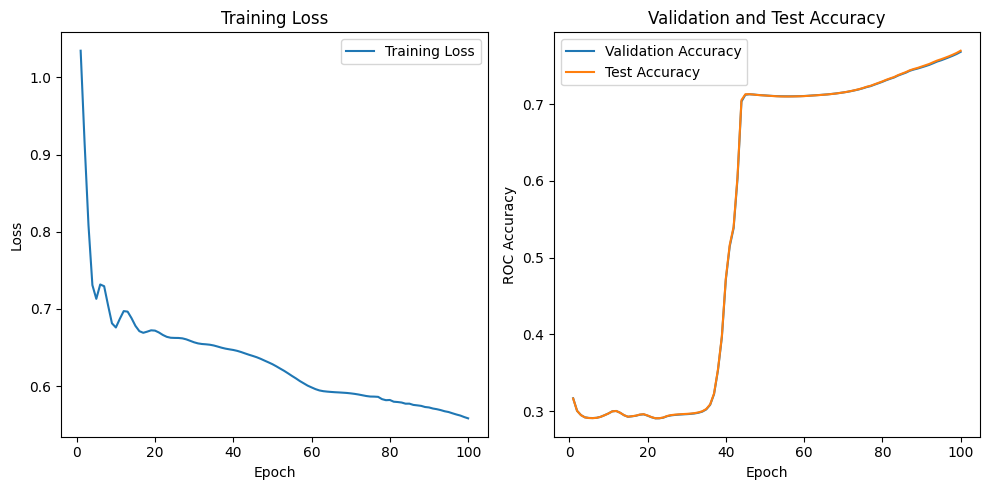

Epoch: 001, Loss: 0.5563, Val: 0.7704, Test: 0.7719
Epoch: 002, Loss: 0.5542, Val: 0.7728, Test: 0.7744
Epoch: 003, Loss: 0.5522, Val: 0.7754, Test: 0.7771
Epoch: 004, Loss: 0.5501, Val: 0.7773, Test: 0.7791
Epoch: 005, Loss: 0.5477, Val: 0.7791, Test: 0.7811
Epoch: 006, Loss: 0.5455, Val: 0.7809, Test: 0.7827
Epoch: 007, Loss: 0.5433, Val: 0.7820, Test: 0.7839
Epoch: 008, Loss: 0.5412, Val: 0.7833, Test: 0.7852
Epoch: 009, Loss: 0.5392, Val: 0.7842, Test: 0.7861
Epoch: 010, Loss: 0.5375, Val: 0.7849, Test: 0.7868
Epoch: 011, Loss: 0.5361, Val: 0.7858, Test: 0.7876
Epoch: 012, Loss: 0.5349, Val: 0.7862, Test: 0.7880
Epoch: 013, Loss: 0.5339, Val: 0.7869, Test: 0.7886
Epoch: 014, Loss: 0.5331, Val: 0.7873, Test: 0.7890
Epoch: 015, Loss: 0.5324, Val: 0.7878, Test: 0.7895
Epoch: 016, Loss: 0.5318, Val: 0.7884, Test: 0.7900
Epoch: 017, Loss: 0.5312, Val: 0.7888, Test: 0.7905
Epoch: 018, Loss: 0.5307, Val: 0.7894, Test: 0.7910
Epoch: 019, Loss: 0.5303, Val: 0.7896, Test: 0.7912
Epoch: 020, 

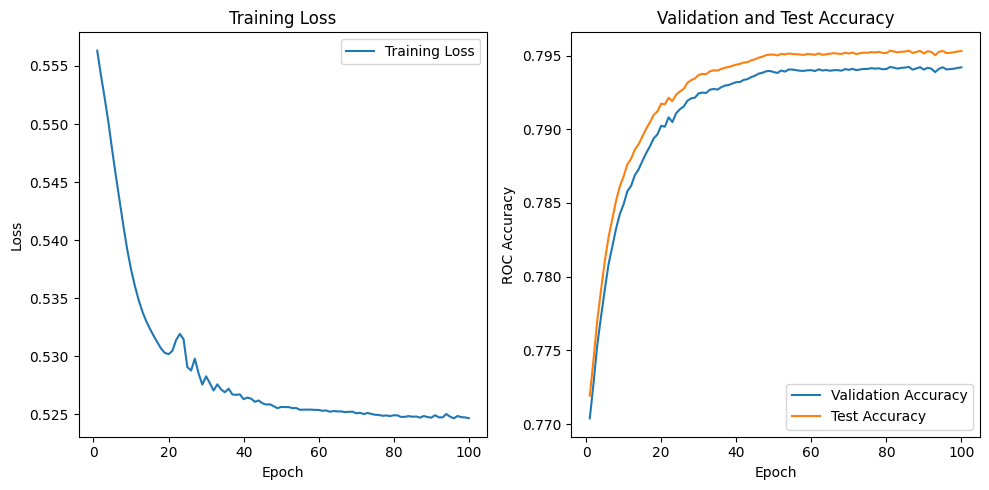

Epoch: 001, Loss: 0.5246, Val: 0.7942, Test: 0.7953
Epoch: 002, Loss: 0.5246, Val: 0.7944, Test: 0.7955
Epoch: 003, Loss: 0.5244, Val: 0.7943, Test: 0.7954
Epoch: 004, Loss: 0.5245, Val: 0.7942, Test: 0.7953
Epoch: 005, Loss: 0.5246, Val: 0.7944, Test: 0.7955
Epoch: 006, Loss: 0.5244, Val: 0.7943, Test: 0.7954
Epoch: 007, Loss: 0.5245, Val: 0.7943, Test: 0.7953
Epoch: 008, Loss: 0.5245, Val: 0.7944, Test: 0.7955
Epoch: 009, Loss: 0.5244, Val: 0.7943, Test: 0.7954
Epoch: 010, Loss: 0.5245, Val: 0.7943, Test: 0.7953
Epoch: 011, Loss: 0.5245, Val: 0.7943, Test: 0.7954
Epoch: 012, Loss: 0.5244, Val: 0.7944, Test: 0.7955
Epoch: 013, Loss: 0.5244, Val: 0.7943, Test: 0.7954
Epoch: 014, Loss: 0.5245, Val: 0.7943, Test: 0.7954
Epoch: 015, Loss: 0.5244, Val: 0.7944, Test: 0.7955
Epoch: 016, Loss: 0.5243, Val: 0.7945, Test: 0.7956
Epoch: 017, Loss: 0.5243, Val: 0.7944, Test: 0.7955
Epoch: 018, Loss: 0.5244, Val: 0.7945, Test: 0.7956
Epoch: 019, Loss: 0.5242, Val: 0.7944, Test: 0.7955
Epoch: 020, 

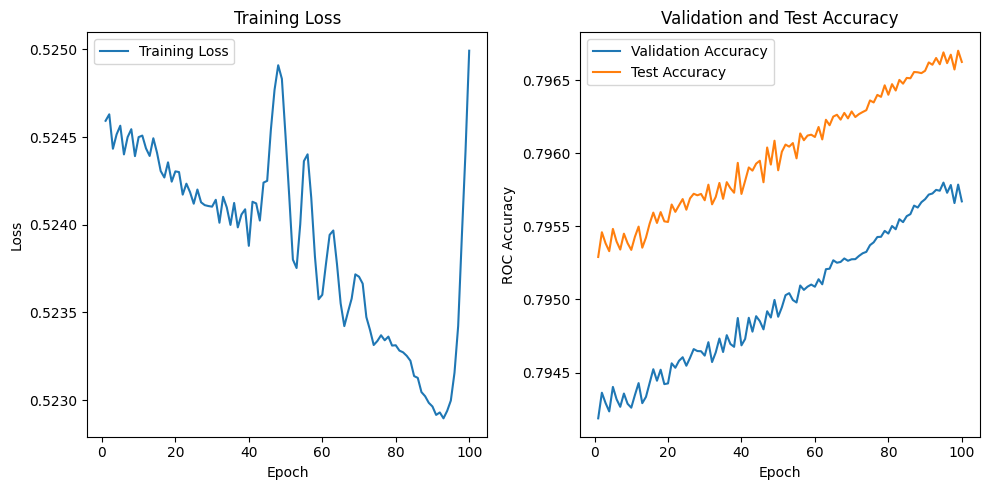

In [70]:
import torch.nn.init as init

final_test_acc_list = []
final_val_list=[]
final_loss_list = []


for i in range(3):
   final_loss, final_val, final_acc = run_model()
   final_loss_list.append(final_loss.detach().numpy())
   final_val_list.append(final_val)
   final_test_acc_list.append(final_acc)


In [71]:
final_test_acc_list= np.array(final_test_acc_list)
final_val_list=np.array(final_val_list)
final_loss_list= np.array(final_loss_list)

# Mean
loss_mean_value = np.mean(final_loss_list)
val_mean_value = np.mean(final_val_list)
acc_mean_value = np.mean(final_test_acc_list)
print(f"loss Mean: {loss_mean_value}")
print(f"val Mean: {val_mean_value}")
print(f"Acc Mean: {acc_mean_value}")

# Max
loss_max_value = np.max(final_loss_list)
val_max_value = np.max(final_val_list)
acc_max_value = np.max(final_test_acc_list)
print(f"loss_Max: {loss_max_value}")
print(f"val_Max: {val_max_value}")
print(f"acc_Max: {acc_max_value}")

# Standard Deviation
loss_std_dev = np.std(final_loss_list)
val_std_dev = np.std(final_val_list)
acc_std_dev = np.std(final_test_acc_list)
print(f"loss_Standard Deviation: {loss_std_dev}")
print(f"val_Standard Deviation: {val_std_dev}")
print(f"acc_Standard Deviation: {acc_std_dev}")

loss Mean: 0.5359423756599426
val Mean: 0.7860250772567934
Acc Mean: 0.7871822702208714
loss_Max: 0.55816251039505
val_Max: 0.7957995463508049
acc_Max: 0.7966901824046303
loss_Standard Deviation: 0.015712536871433258
val_Standard Deviation: 0.012728655981114462
acc_Standard Deviation: 0.012493514648915491


In [63]:
mean=(0.8056 + 0.8083 + 0.8066)/3
print(mean)

0.8068333333333334
